<a href="https://colab.research.google.com/github/macapagithub/vaccines-h1n1/blob/main/prepocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Técnicas para la Ciencia de Datos

##Descripción del Problema

El objetivo del problema, es predecir la probabilidad de que las personas reciban sus vacunas contra la griba estacional y H1N1.

Cada fila del conjunto de datos, representa a una persona que respondió a una encuesta en Estados Unidos, sobre la gripa estacional y la gripe H1N1 de 2009. 

El problema es planteado en una competencia por la plataforma [**Data Driven**](https://www.drivendata.org/). El nombre de la competencia es [Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines](https://www.drivendata.org/competitions/66/flu-shot-learning/), que es de donde provienen los datos.


La competencia está en ingles, por tanto no voy a traducir la mayoria de las variables, para no cambiar el significado de las variables o, realizar una mala traducción. Para está competición hay dos variables objetivos:

* h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
* seasonal_vaccine - Whether respondent received seasonal flu vaccine.

Ambas son variables binarias: 0 = No; 1 = si.

Algunos recibieron ambas vacunas, o solo una de ellas.

El conjunto de datos tiene 36 columnas y, la primera de ellas es el id. El resto de las variables que son binarias, son: 0 = No; 1 = Yes. En general, las variables son las siguientes:

* *h1n1_concern* - Nivel de preocupación por la gripa H1N1.
  * 0 = Nada preocupado; 1 = No muy preocupado; 2 = Algo preocupado; 3 = Muy preocupado.
* *h1n1_knowledge* - Nivel de conocimiento a cerca de H1N1.
  * 0 = Nada de conocimiento; 1 = Un poco de conocomiento; 2 = Mucho conocimiento.
* *behavioral_antiviral_meds* - Ha tomado medicamentos antivirales. (binary)
* *behavioral_avoidance* - Ha evitado contacto cercano con alguien con sintimas de gripa. (binary)
* *behavioral_face_mask* - Ha comprado mascarilla. (binary)
* *behavioral_wash_hands* - Se ha lavado las manos de manera frecuente o ha usado desinfectante. (binary)
* *behavioral_large_gatherings* -  Ha reducio el tiempo de grandes reuniones. (binary)
* *behavioral_outside_home* - Ha reducido el contacto con personas fuera de hogar. (binary)
* *behavioral_touch_face* -  Ha evitado tocarse los ojos, la nariz y la boca. (binary)
* *doctor_recc_h1n1* - El medico te recomendó la vacuna H1N1. (binary)
* *doctor_recc_seasonal* - El medico recomendó la vacuna estacional. (binary)
* *chronic_med_condition* - Tiene alguna de las siguientes afecciones médicas crónicas: asma u afección pulmonar, diabetes, afección cardíaca, afección renal, anemia, afección neurológica, afección hepática. (binary)
* *child_under_6_months* - Tiene contacto cercano regular con un niño menor de seis meses. (binary)
* *health_worker* - Es un trabajador de la salud. (binary)
* *health_insurance* - Tiene seguro de salud. (binary)
* *opinion_h1n1_vacc_effective* - Opinion sobre la efectividad de la vacuna.
  * 1 = Nada eficaz; 2 = No muy eficaz ; 3 = No sé; 4 = Algo efectivo; 5 = Muy efica.
* *opinion_h1n1_risk* - Opinion sobre enfermarse por la gripa H1N1 sin la vacuna.
  * 1 = Muy bajo; 2 = Algo bajo; 3 = No sabe; 4 = Algo alto; 5 = Muy alto.
* *opinion_h1n1_sick_from_vacc* - La preocupación de enfermarse por recibir la vacuna H1N1..
1 = Nada preocupado; 2 = No muy preocupado; 3 = No sabe; 4 = Algo preocudo; 5 = Muy preocupado.
* *opinion_seas_vacc_effective* - Opinión del encuestado sobre la efectividad de la vacuna contra la gripa estacional.
1 = Nada efica; 2 = No muy efectivo; 3 = No sabe; 4 = Algo efectivo; 5 = Muy efectivo.



------------------------------------------
opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
age_group - Age group of respondent.
education - Self-reported education level.
race - Race of respondent.
sex - Sex of respondent.
income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
marital_status - Marital status of respondent.
rent_or_own - Housing situation of respondent.
employment_status - Employment status of respondent.
hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
household_adults - Number of other adults in household, top-coded to 3.
household_children - Number of children in household, top-coded to 3.
employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

Carga de librerias y Datos

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from sklearn import *
pd.set_option("display.max_columns", 100)

In [2]:
url_train_labels = 'https://raw.githubusercontent.com/macapagithub/vaccines-h1n1/main/data/training_set_labels.csv'
url_train_features = 'https://raw.githubusercontent.com/macapagithub/vaccines-h1n1/main/data/training_set_features.csv'
url_test_features = 'https://raw.githubusercontent.com/macapagithub/vaccines-h1n1/main/data/test_set_features.csv'

In [3]:
test_features_df = pd.read_csv(url_test_features)
train_features_df = pd.read_csv(url_train_features)
train_labels_df = pd.read_csv(url_train_labels)

Analisamos los datos.

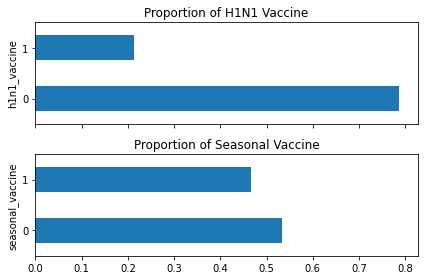

In [4]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = train_labels_df.shape[0]

(train_labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(train_labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")
fig.tight_layout()

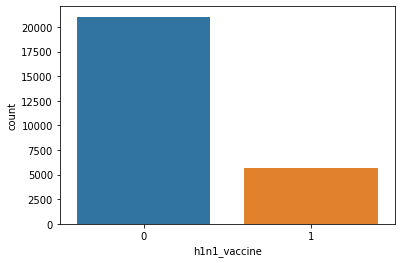

In [5]:
sns.countplot(x=train_labels_df.h1n1_vaccine, data=train_labels_df)

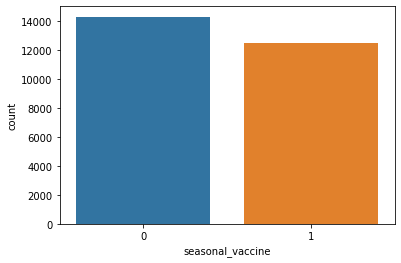

In [6]:
sns.countplot(x=train_labels_df.seasonal_vaccine, data=train_labels_df)

Los datos en funciones de la 'seasonal vaccine', están muy cercanas las cantidades. Por el lado de la vacuna H1N1, los datos están desbalanceados, ya que la cantidad de personas no vacunadas por H1N1, son mucho más que los que no. Esto podría tener un sesgo hacia las personas no vacunadas por H1N1.

In [7]:
joined_df = train_features_df.set_index('respondent_id').join(train_labels_df.set_index('respondent_id'))
# print(joined_df.shape)
# joined_df.head()

counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )

In [8]:
joined_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


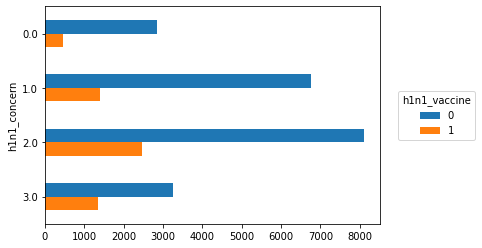

In [9]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='h1n1_vaccine'
)

In [10]:
group_counts = counts.sum(axis='columns')
props = counts.div(group_counts, axis='index')

props.plot(kind="barh", stacked=True, ax=ax)
ax.invert_yaxis()
ax.legend().remove()

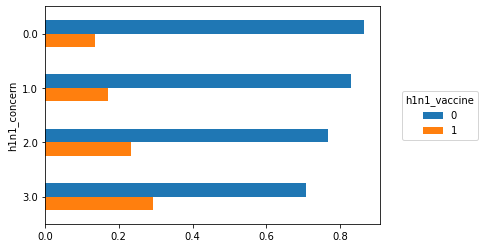

In [11]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

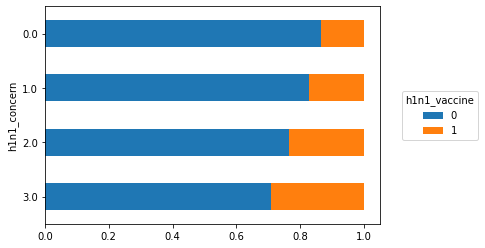

In [12]:
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [13]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

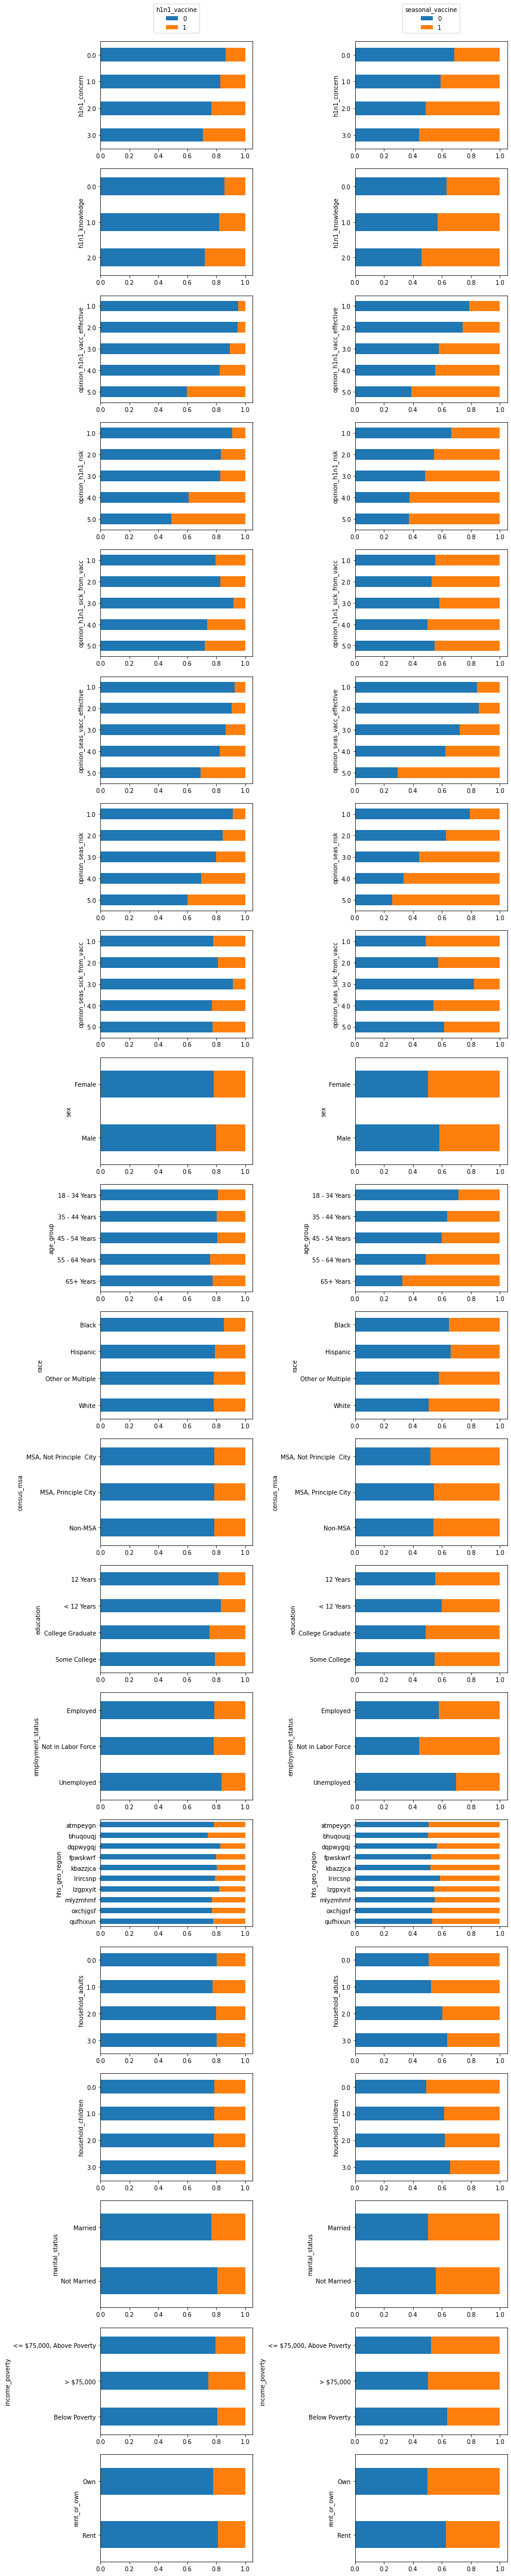

In [14]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
    'census_msa',
    'education',
    'employment_status',
    'hhs_geo_region',
    'household_adults',
    'household_children',
    'marital_status',
    'income_poverty',
    'rent_or_own'
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(12,len(cols_to_plot)*3)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

### Tratamiento dado a los datos y, Modelado.

In [15]:
train_features_df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [16]:
joined_df = train_features_df.set_index('respondent_id').join(train_labels_df.set_index('respondent_id'))
# joined_df = train_features_df.join(train_labels_df)
print(joined_df.shape)
joined_df.head(3)

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0


In [17]:
print("labels_df.shape", train_labels_df.shape)
train_labels_df.head()

labels_df.shape (26707, 3)


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
RANDOM_SEED = 10

In [19]:
numeric_cols = train_features_df.columns[train_features_df.dtypes != "object"].values
print(numeric_cols)
print('---'*25)
categorical_cols = train_features_df.columns[train_features_df.dtypes == "object"].values
print(categorical_cols)

['respondent_id' 'h1n1_concern' 'h1n1_knowledge'
 'behavioral_antiviral_meds' 'behavioral_avoidance' 'behavioral_face_mask'
 'behavioral_wash_hands' 'behavioral_large_gatherings'
 'behavioral_outside_home' 'behavioral_touch_face' 'doctor_recc_h1n1'
 'doctor_recc_seasonal' 'chronic_med_condition' 'child_under_6_months'
 'health_worker' 'health_insurance' 'opinion_h1n1_vacc_effective'
 'opinion_h1n1_risk' 'opinion_h1n1_sick_from_vacc'
 'opinion_seas_vacc_effective' 'opinion_seas_risk'
 'opinion_seas_sick_from_vacc' 'household_adults' 'household_children']
---------------------------------------------------------------------------
['age_group' 'education' 'race' 'sex' 'income_poverty' 'marital_status'
 'rent_or_own' 'employment_status' 'hhs_geo_region' 'census_msa'
 'employment_industry' 'employment_occupation']


In [20]:
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])


preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [21]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(random_state=10, penalty="l2", C=1)
)

In [22]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [23]:
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_lar...
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
       'household_adults', 'household_ch

In [24]:
X_train, X_eval, y_train, y_eval = train_test_split(
    train_features_df,
    train_labels_df,
    test_size=0.25,
    shuffle=True,
    # stratify=labels_df,
    random_state=10
    )

In [ ]:
full_pipeline.fit(X_train, y_train)

In [ ]:
y_preds = full_pipeline.predict(X_eval, y_eval)

In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

In [ ]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
test_features_df = pd.read_csv(test_feature_df)
test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

In [ ]:
# submission_df = pd.read_csv(DATA_PATH / "submission_format.csv", 
#                             index_col="respondent_id")